In [11]:
using Causality, IntervalUnionArithmetic

┌ Info: Precompiling Causality [943c2df0-3341-4665-8895-8aff0dd63d80]
└ @ Base loading.jl:1423
  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **



In [12]:
T, N = 20.0, 50
ρ = 5/N
G = Causality.makeGNP(N,ρ)

{50, 236} directed sparse Int64 graph
⠀⠀⠠⠀⠤⠀⠀⠀⠀⢌⠀⠀⢀⠀⠤⠀⠄⠂⠀⠀⠰⠆⡀⠀⠀
⠀⠂⠀⠀⠀⠄⡀⠈⠁⠀⡀⠀⠀⠀⠁⡠⠀⠀⠁⡐⠠⠀⠂⠀⠂
⠀⠃⠀⠄⠀⠀⠀⠀⠀⡀⠀⢀⠀⠀⠊⢠⡐⠠⡀⡀⠆⢀⠄⠐⠀
⠀⠀⡀⠈⠀⠀⠀⠀⡂⠀⠁⠀⡄⠈⠀⠀⢀⠂⠀⢀⠀⠁⠆⠀⠉
⡀⢄⠁⠀⠀⠠⠈⠈⢀⠐⠀⠁⠀⢀⠄⠂⠠⡈⠀⠘⠠⠒⠀⠂⡀
⠀⠀⠀⠈⠀⢀⠁⠀⠄⠀⢀⠐⠁⡀⠄⠠⠀⠀⠤⠀⠂⠨⡂⠄⡑
⠀⠐⠀⠀⠀⠀⡀⠉⠀⢀⠁⠠⡀⠈⠈⠑⠀⡀⠀⢀⠠⠀⠀⠅⠀
⠀⠃⠁⡠⠊⣀⠀⠀⠠⠁⠀⡁⢆⠀⢀⠐⠑⠎⠀⠀⠀⠀⠈⠠⠀
⠠⠁⠀⠀⠐⡈⠠⠐⡀⠢⠀⠀⠀⠠⡱⠄⠀⠀⠀⠀⠀⠀⠠⠂⠂
⠀⠀⢁⠠⠀⠨⠀⢀⣀⠀⠀⠃⠀⢀⠀⠀⠀⠀⠀⠀⠂⠀⠠⠐⠀
⠰⠆⠀⠂⠈⢁⠄⠀⢠⠂⡈⡀⠀⠂⠀⠀⠀⠀⠈⠀⠀⠀⠂⠠⠀
⠀⠈⠈⠀⢀⠁⠈⠁⠠⠀⠈⠌⠄⠄⠂⡀⠠⠂⢀⠂⠈⡀⠀⠀⠐
⠀⠀⠈⠀⠀⠀⠃⠀⠀⠈⠑⠈⠀⠀⠀⠀⠈⠀⠀⠀⠀⠀⠐⠀⠊

In [13]:
getpargen(inf_out::GaussianRate, lat_gen::GaussianRate, rec_gen::GaussianRate) = 
    [inf_out.a inf_out.b inf_out.c lat_gen.a lat_gen.b lat_gen.c rec_gen.a rec_gen.b rec_gen.c]


getpar(pseed,autoinf::GaussianRate,inf_in::GaussianRate, latency::GaussianRate, recov::GaussianRate) = 
    [fill(pseed, 1, N);
     fill(autoinf.a, 1, N); fill(autoinf.b, 1, N); fill(autoinf.c, 1, N);
     fill(inf_in.a,   1, N); fill(inf_in.b, 1, N); fill(inf_in.c, 1, N);
     fill(latency.a, 1, N); fill(latency.b, 1, N); fill(latency.c, 1, N);
     fill(recov.a, 1, N); fill(recov.b, 1, N); fill(recov.c, 1, N)
    ]

getpar (generic function with 1 method)

In [14]:
#Initialize generation parameters
ε = 1e-10
λ = 0.6
pseed = 10/N 
autoinf = GaussianRate(ε, T/2, 1/ε)
inf_in = GaussianRate(1.0, T/2, 1/ε)
latency = GaussianRate(1., T/2, 1/ε)
recov = GaussianRate(1., T/2, 1/ε)

inf_out = GaussianRate(λ, 4., 3.)
l_delay = GaussianRate(0.8, 2., 3.)
r_delay = GaussianRate(0.1, 6., 4.)

θp = getpar(pseed, autoinf, inf_in, latency, recov);
θpgen = getpargen(inf_out, l_delay, r_delay);

In [15]:
θpgen

1×9 Matrix{Float64}:
 0.6  4.0  3.0  0.8  2.0  3.0  0.1  6.0  4.0

In [16]:
#Initialize min/max boundaies
pseed_min = ε
pseed_max = 1-ε
rate_min = GaussianRate(ε  ,  -T,   ε)
rate_max = GaussianRate(1/ε  ,  2T,   1/ε)

θmin = getpar(pseed_min , rate_min, rate_min, rate_min, rate_min);
θmax = getpar(pseed_max , rate_max, rate_max, rate_max, rate_max);

rate_min = GaussianRate(ε  ,  -T,   ε)
rate_max = GaussianRate(3.  ,  T,   T)

θgenmin = getpargen(rate_min, rate_min, rate_min);
θgenmax = getpargen(rate_max, rate_max, rate_max);

In [17]:
const I = InferentialSEIR{GaussianRate,GaussianRate,GaussianRate,GaussianRate,GaussianRate,GaussianRate,GaussianRate}

InferentialSEIR{GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate}

In [18]:
Mp = StochasticModel(I, T, θp, G, θpgen);
sample! = Sampler(Mp);

In [19]:
xtrue = zeros(N,3)
sample!(xtrue)
nobs, p = 50, 1e-6
O = [(ti = T*(1+rand())/2; (i,xtrue[i,2] < ti < xtrue[i,3],ti,p)) for i=1:nobs]

50-element Vector{Tuple{Int64, Bool, Float64, Float64}}:
 (1, 1, 16.18335270287551, 1.0e-6)
 (2, 0, 18.696219818995413, 1.0e-6)
 (3, 0, 16.85970912297707, 1.0e-6)
 (4, 1, 10.206035681416914, 1.0e-6)
 (5, 0, 17.81547137007903, 1.0e-6)
 (6, 1, 10.42039403290126, 1.0e-6)
 (7, 0, 17.452507844897074, 1.0e-6)
 (8, 0, 13.56187470947944, 1.0e-6)
 (9, 0, 15.533970882857439, 1.0e-6)
 (10, 1, 18.85971554553171, 1.0e-6)
 (11, 0, 12.873100101212572, 1.0e-6)
 (12, 0, 15.558444538557929, 1.0e-6)
 (13, 0, 10.556255269389636, 1.0e-6)
 ⋮
 (39, 0, 16.959022584749185, 1.0e-6)
 (40, 1, 14.002536036194133, 1.0e-6)
 (41, 1, 17.448625301533333, 1.0e-6)
 (42, 1, 14.821724562805766, 1.0e-6)
 (43, 0, 12.915294707767547, 1.0e-6)
 (44, 1, 13.881923150219881, 1.0e-6)
 (45, 0, 16.735959563158044, 1.0e-6)
 (46, 0, 13.603379769495632, 1.0e-6)
 (47, 1, 14.890158835799463, 1.0e-6)
 (48, 0, 18.774750842038294, 1.0e-6)
 (49, 1, 17.05846665078098, 1.0e-6)
 (50, 1, 12.396342267091816, 1.0e-6)

In [21]:
xtrue

50×3 Matrix{Float64}:
 11.9544   12.2804    20.0
  6.1102   20.0       20.0
  7.19943  10.2055    11.8916
  6.45477   8.38259   20.0
  1.53059   4.47878   12.8668
  7.31537   9.27336   12.1143
  4.51098   4.68435    5.68737
  3.83934   4.56307   13.3987
 20.0      20.0       20.0
  4.99599   6.20457   20.0
  0.0       3.00604    9.72065
  0.0       1.3166     7.96694
  0.0       0.977497   6.37539
  ⋮                   
  2.50505   4.59039    9.7214
  2.941     4.0361    20.0
  0.0       2.46882   20.0
  4.48713   5.31546   20.0
 12.9458   13.9885    20.0
  4.23148   4.60801   20.0
  4.89161   5.07117   13.4612
  5.00639   5.87193    8.44966
  6.1725    8.00239   20.0
  8.26129   9.28818   15.9688
  2.54868   4.10787   20.0
  2.01914   2.60094   20.0

In [22]:
#Initialize softened model
T = Float64(T)
ε = 2e-3

inf_out = GaussianRate(0.1, 7., 6.)
l_delay = GaussianRate(1/2, 7., 5.)
r_delay = GaussianRate(1/2, 4., 4.)

autoinf = GaussianRate(ε, T/2, 1/ε)

θp2gen = getpargen(inf_out, l_delay, r_delay);
θp2 = getpar(pseed, autoinf, inf_in, latency, recov);
Mp2 = StochasticModel(I, T, θp2, G, θpgen);

In [23]:
θpgen

1×9 Matrix{Float64}:
 0.6  4.0  3.0  0.8  2.0  3.0  0.1  6.0  4.0

In [24]:
θp2gen

1×9 Matrix{Float64}:
 0.1  7.0  6.0  0.5  7.0  5.0  0.5  4.0  4.0

In [25]:
#Initialize the parameters to learn

autoinf = GaussianRate(1/N, T/2, 2T)
inf_in = GaussianRate(1.0, T/2, 2T)
latency = GaussianRate(1., T/2, 2T)
recov = GaussianRate(1., T/2, 2T)


θ = getpar(pseed, autoinf, inf_in,  latency, recov);
M = StochasticModel(I, T, θp2, G, θpgen);

In [26]:
using ProgressMeter
ProgressMeter.ijulia_behavior(:clear)
descend!(Mp2, O; M=M, numsamples=1000, numiters=200, 
         θmin=θmin, θmax=θmax,θgenmin=θgenmin, θgenmax=θgenmax, descender=SignDescender(0.),
         hyperdescender=SignDescender(0.01),learnhyper=1);
#descend!(Mp2, O; M=M, numsamples=1000, numiters=100, 
 #        θmin=θmin, θmax=θmax,θgenmin=θgenmin, θgenmax=θgenmax, descender=SignDescender(0.03));

Progress: 100%|█████████████████████████████████████████| Time: 0:01:38
  F:  295.8591871838196


In [15]:
println(round.(θp2gen,digits=4))

[0.1 7.0 6.0 0.5 7.0 5.0 0.5 4.0 4.0]


In [16]:
println(round.(θpgen,digits=3))

[0.08 20.0 0.402 3.0 0.268 20.0 0.732 0.804 20.0]


In [17]:
θpgen

1×9 Matrix{Float64}:
 0.0803878  20.0  0.401939  3.0  0.267959  20.0  0.731602  0.803878  20.0

In [18]:
θ

13×50 Matrix{Float64}:
  0.2    0.2    0.2    0.2    0.2   …   0.2    0.2    0.2    0.2    0.2
  0.02   0.02   0.02   0.02   0.02      0.02   0.02   0.02   0.02   0.02
 10.0   10.0   10.0   10.0   10.0      10.0   10.0   10.0   10.0   10.0
 40.0   40.0   40.0   40.0   40.0      40.0   40.0   40.0   40.0   40.0
  1.0    1.0    1.0    1.0    1.0       1.0    1.0    1.0    1.0    1.0
 10.0   10.0   10.0   10.0   10.0   …  10.0   10.0   10.0   10.0   10.0
 40.0   40.0   40.0   40.0   40.0      40.0   40.0   40.0   40.0   40.0
  1.0    1.0    1.0    1.0    1.0       1.0    1.0    1.0    1.0    1.0
 10.0   10.0   10.0   10.0   10.0      10.0   10.0   10.0   10.0   10.0
 40.0   40.0   40.0   40.0   40.0      40.0   40.0   40.0   40.0   40.0
  1.0    1.0    1.0    1.0    1.0   …   1.0    1.0    1.0    1.0    1.0
 10.0   10.0   10.0   10.0   10.0      10.0   10.0   10.0   10.0   10.0
 40.0   40.0   40.0   40.0   40.0      40.0   40.0   40.0   40.0   40.0

In [19]:
function histo(v; bins=20, up=1.0)
    h = zeros(bins+1)
    z = length(v)
    for x in v
        h[floor(Int, x*bins/up)+1]+=1/z
    end
    h
end

histo (generic function with 1 method)

In [20]:
stats = post(Mp, O, numsamples=10000);

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


In [21]:
statscau = prior(M);

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


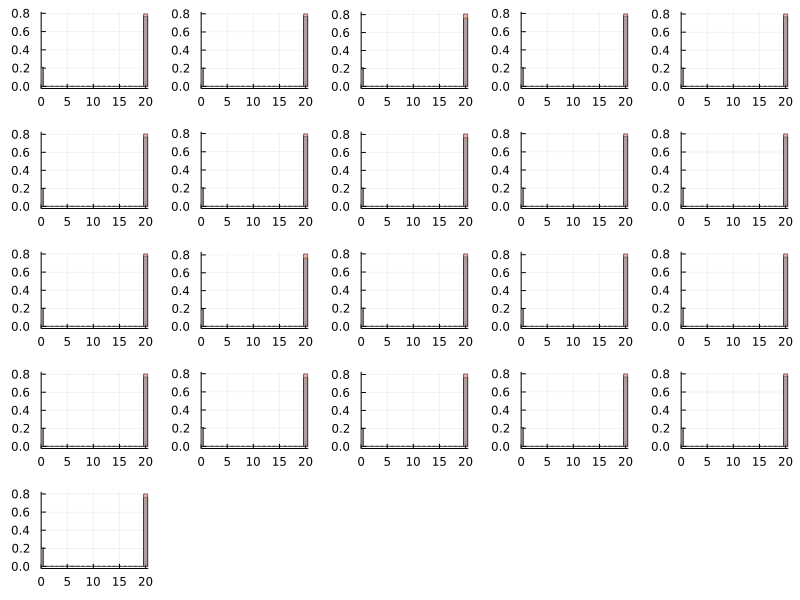

In [22]:
using Plots
state = 1
pl = map(1:21) do k
    p = plot()
    bar!(p, 0:M.T/20:M.T, histo((@view statscau[:, k, state]), up=M.T), alpha=0.5, xlims=(0,M.T+0.5), bins=20, label="cau", legend=false);
    bar!(p, 0:M.T/20:M.T, histo((@view stats[:, k, state]), up=M.T),    alpha=0.5, xlims=(0,M.T+0.5), bins=20, label="true", legend=false);
end;
savefig("marginals.pdf")
plot(pl..., size=(800,600))

## Marginals and ROC curve

In [23]:
function marginal(i, t, stats)
    numsamp = size(stats,1)
    sum( stats[:,i,2] .< t .< stats[:,i,3] ) / numsamp
end

function tpr(xtrue, rank) 
    den = sum(xtrue[rank])
    if den != 0
        return cumsum(xtrue[rank]) ./ den
    else
        return ones(size(rank))
    end
end

function fpr(xtrue, rank) 
    N = size(rank,1)
    return (range(1,N,length=N) .- cumsum(xtrue[rank])) ./ (range(1,N,length=N) .- cumsum(xtrue[rank]) )[end]
end

function ROC(xtrue, p)
    N = size(xtrue,1)
    rank = sortperm(p, rev=true)
    
    return fpr(xtrue, rank) , tpr(xtrue, rank)
end

function AUROC(ROC)
    N = size(ROC[1],1) 
    AU = 0
    for t = 1:N-1
        AU += ROC[2][t] * (ROC[1][t+1] - ROC[1][t])
    end
    return AU
end

AUROC (generic function with 1 method)

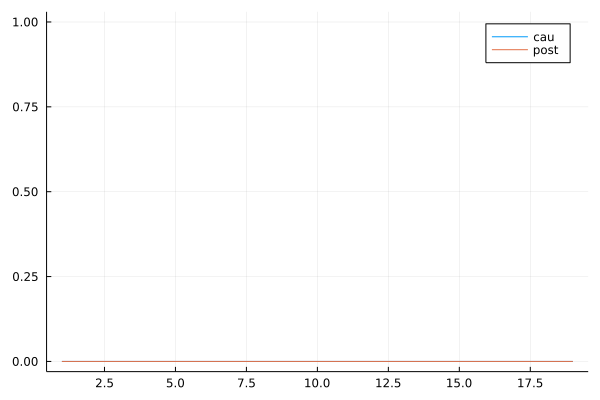

In [24]:
using Plots
p_cau = zeros(N,Int(T))
p_exact = zeros(N,Int(T))
for i = 1:N
    for t = 1:Int(T)
       p_cau[i,t] = marginal(i, t, statscau)
       p_exact[i,t] = marginal(i, t, stats)
    end
end
i = 2
plot(p_cau[i,1:end-1], label = "cau")
plot!(p_exact[i,1:end-1], label = "post")

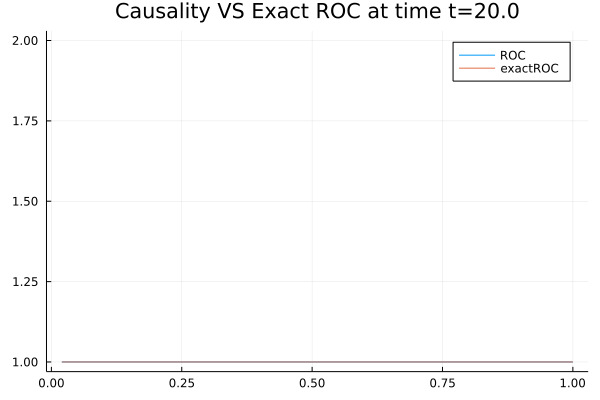

In [25]:
#Let us find the ROC of the infected individuals at time t
t = T
epidemic_risk=zeros(N)
true_risk=zeros(N)
for i=1:N
   epidemic_risk[i] = marginal(i,t,statscau)
   true_risk[i] = marginal(i,t,stats)
end
xt = xtrue[:,2] .< t-1e-3 .< xtrue[:,3]
plot(ROC(xt, epidemic_risk)[1],ROC(xt, epidemic_risk)[2], label="ROC", title="Causality VS Exact ROC at time t=$t")
plot!(ROC(xt, true_risk)[1],ROC(xt, true_risk)[2], label="exactROC")

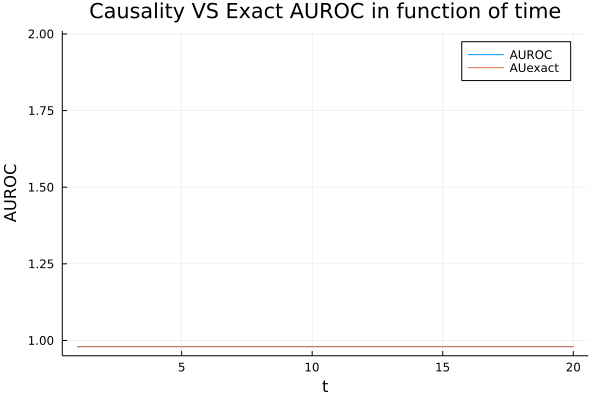

In [26]:
T = Int(T)
AU_curve=zeros(T)
AU_exact=zeros(T)
for t = 1:T
    epidemic_risk=zeros(N)
    true_risk=zeros(N)
    for i=1:N
       epidemic_risk[i] = marginal(i,t,statscau)
       true_risk[i] = marginal(i,t,stats)
    end
    xt = xtrue[:,2] .< t-1e-3 .< xtrue[:,3]
    AU_curve[t] = AUROC(ROC(xt, epidemic_risk))
    AU_exact[t] = AUROC(ROC(xt, true_risk))
end

plot(LinRange(1,T,T),AU_curve, label="AUROC", title="Causality VS Exact AUROC in function of time")
plot!(LinRange(1,T,T),AU_exact, label="AUexact")
T = Float64(T)
savefig("SEIR_AUROC.pdf")
xlabel!("t")
ylabel!("AUROC")